In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
## load the data
df = pd.read_csv('./data_sets/insurance.csv')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


      sex  total_count  smoker_count  percentage_smokers
0  female          662           115              17.372
1    male          676           159              23.521


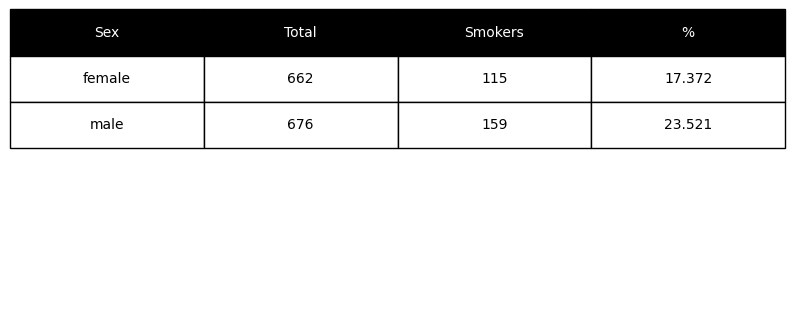

In [30]:


# Step 1: Calculate the total number of individuals in each sex category
total_counts = df.groupby('sex').size().reset_index(name='total_count')

# Step 2: Calculate the number of smokers in each sex category
smoker_counts = df[df['smoker'] == 'yes'].groupby('sex').size().reset_index(name='smoker_count')

# Step 3: Merge the total counts and smoker counts
merged_counts = pd.merge(total_counts, smoker_counts, on='sex')

# Step 4: Calculate the percentage of smokers and limit decimal points to three
merged_counts['percentage_smokers'] = (merged_counts['smoker_count'] / merged_counts['total_count']) * 100
merged_counts['percentage_smokers'] = merged_counts['percentage_smokers'].round(3)

# Print the result
print(merged_counts)

# Optionally, print the result in table form with matplotlib
fig, ax = plt.subplots(figsize=(10, 2))  # Set the figure size
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=merged_counts.values, colLabels=['Sex', 'Total', 'Smokers', '%'], cellLoc='center', loc='top')

# Set the background color of the column names to black
for key, cell in table.get_celld().items():
    if key[0] == 0:  # This is the header row
        cell.set_facecolor('black')
        cell.set_text_props(color='white')  # Set text color to white for contrast
    cell.set_height(0.3)  # Increase the height of each cell

plt.show()

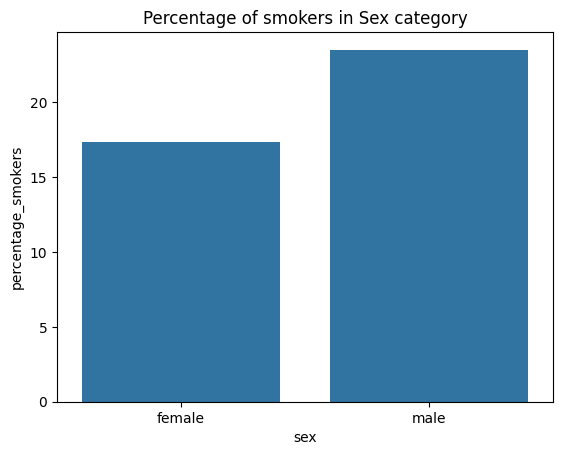

In [31]:
# plot the bar chart
sns.barplot(data=merged_counts, x='sex', y='percentage_smokers')
plt.title('Percentage of smokers in Sex category')
plt.show()



([<matplotlib.patches.Wedge at 0x1cb8de57530>,
 [Text(0.25740810523788954, 1.0694583055724238, 'female'),
  Text(-0.25740790497805954, -1.0694583537729772, 'male')])

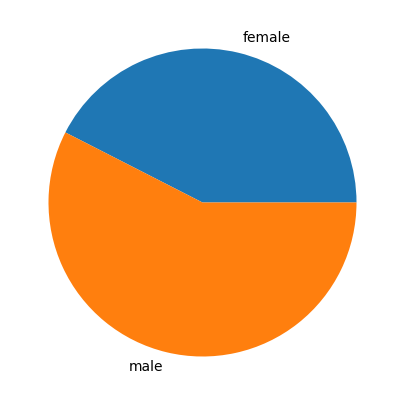

In [34]:
# plot pie chart
plt.figure(figsize=(10, 5))
plt.pie(merged_counts['percentage_smokers'], labels=merged_counts['sex'])


In [37]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


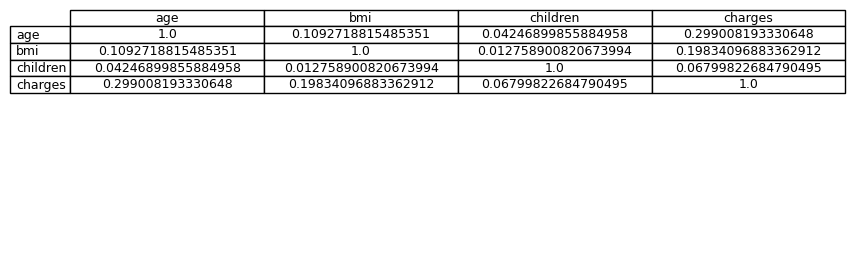

In [39]:
# Calculate the correlation matrix of df['age], df['bmi'], df['children'], df['charges'], df['bmi'] and df['charges'], df['children']
correlation_matrix = df[['age', 'bmi', 'children', 'charges']].corr()   
print(correlation_matrix)

# plot the correlation matrix in table form with matplotlib
fig, ax = plt.subplots(figsize=(10, 2))  # Set the figure size
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=correlation_matrix.values, colLabels=correlation_matrix.columns, rowLabels=correlation_matrix.index, cellLoc='center', loc='top') 
plt.show()


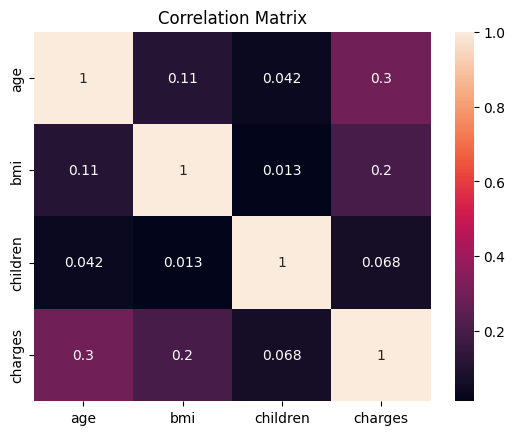

In [40]:
# plot the correlation matrix with seaborn
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()


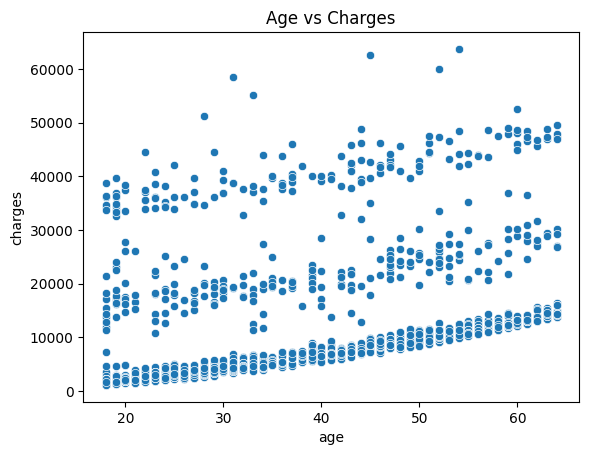

In [41]:
# plot the scatter plot of age vs charges
sns.scatterplot(data=df, x='age', y='charges')
plt.title('Age vs Charges')
plt.show()
